In [2]:
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [4]:
o_data = pd.read_csv('./crime.csv')

In [5]:
data = o_data[['area_name', 'danger', 'area']]
data

,area_name,danger,area
0,CHITRANJAN PARK,686,2.659330
1,DABRI,836,3.401013
2,MALVIYA NAGAR,1157,1.379854
3,CHANDNI MAHAL,730,5.570696
4,MODEL TOWN,658,2.689157
...,...,...,...
161,G.T.B. ENCLAVE,181,2.874304
162,NEW USMANPUR,698,3.093393
163,SONIA VIHAR,668,4.453887
164,KARAWAL NAGAR,617,2.937547


Text(0, 0.5, 'Danger')

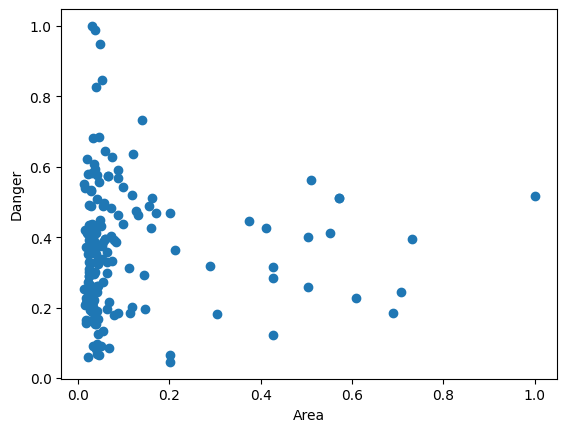

In [19]:
plt.scatter(data['area'], data['danger'])
plt.xlabel('Area')
plt.ylabel('Danger')

In [7]:
max_area = data['area'].max()
max_danger = data['danger'].max()

data['area'] = data['area'] / max_area
data['danger'] = data['danger'] / max_danger

data

C:\Users\Omkar Mishra\AppData\Local\Temp\ipykernel_34084\1299236545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['area'] = data['area'] / max_area
C:\Users\Omkar Mishra\AppData\Local\Temp\ipykernel_34084\1299236545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['danger'] = data['danger'] / max_danger


,area_name,danger,area
0,CHITRANJAN PARK,0.368619,0.037737
1,DABRI,0.449221,0.048262
2,MALVIYA NAGAR,0.621709,0.019581
3,CHANDNI MAHAL,0.392262,0.079051
4,MODEL TOWN,0.353573,0.038161
...,...,...,...
161,G.T.B. ENCLAVE,0.097260,0.040788
162,NEW USMANPUR,0.375067,0.043897
163,SONIA VIHAR,0.358947,0.063203
164,KARAWAL NAGAR,0.331542,0.041685


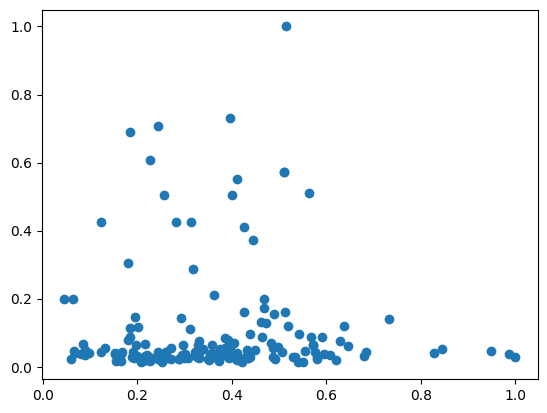

In [8]:
plt.scatter(data['danger'], data['area'])

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

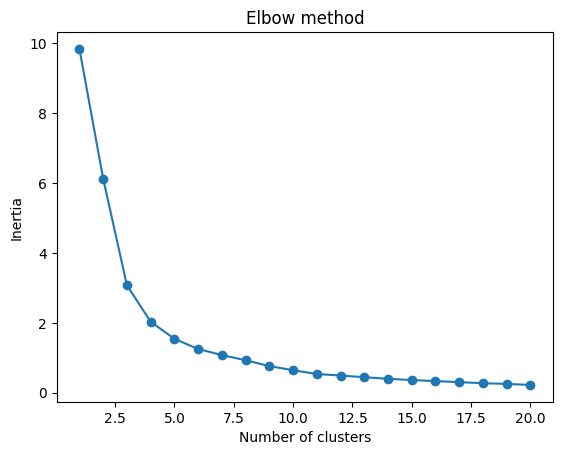

In [9]:
inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['area', 'danger']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


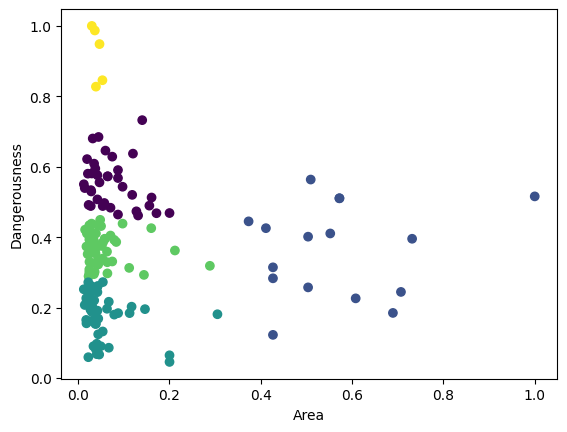

In [17]:
kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(data[['area', 'danger']])

data['cluster'] = pred
o_data['cluster'] = pred

labels = kmeans.labels_



plt.scatter(data['area'], data['danger'], c=kmeans.labels_)
plt.xlabel("Area")
plt.ylabel("Dangerousness")
plt.show()

In [11]:
o_data['cluster']

0      3
1      3
2      2
3      3
4      3
      ..
161    0
162    3
163    3
164    3
165    0
Name: cluster, Length: 166, dtype: int32

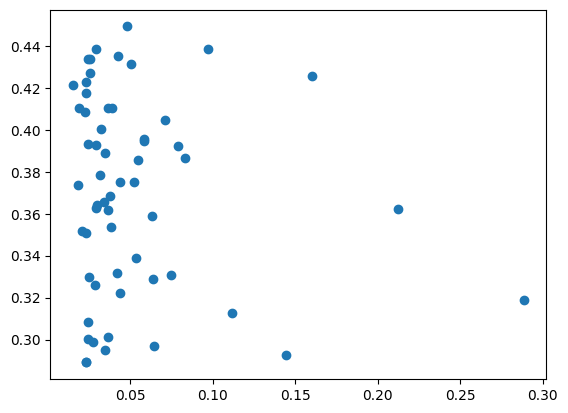

,area_name,danger,area,cluster
0,CHITRANJAN PARK,0.368619,0.037737,3
1,DABRI,0.449221,0.048262,3
3,CHANDNI MAHAL,0.392262,0.079051,3
4,MODEL TOWN,0.353573,0.038161,3
6,KASHMERE GATE,0.289092,0.023101,3
8,BINDAPUR,0.410532,0.036442,3
15,PRASHANT VIHAR,0.438474,0.029469,3
16,SOUTH CAMPUS,0.297152,0.064125,3
22,ADRASH NAGAR,0.350887,0.023360,3
24,PANDAV NAGAR,0.351961,0.020869,3


In [12]:

cl_0 = data[(data['cluster'] == 3)]

plt.scatter(cl_0['area'], cl_0['danger'])
plt.show()

cl_0


In [13]:
# is for cluster number next is dangerousness

#0 dark blue - 0
#1 purple - 1
#2 sea green - 3
#3 yellow - 4
#4 light green - 2

In [14]:
o_data = o_data[['area_name', 'lat', 'long', 'cluster']]
o_data

,area_name,lat,long,cluster
0,CHITRANJAN PARK,28.53632,77.24920,3
1,DABRI,28.61268,77.08600,3
2,MALVIYA NAGAR,28.52989,77.20418,2
3,CHANDNI MAHAL,28.64361,77.23608,3
4,MODEL TOWN,28.70257,77.19369,3
...,...,...,...,...
161,G.T.B. ENCLAVE,28.68496,77.31600,0
162,NEW USMANPUR,28.67202,77.26207,3
163,SONIA VIHAR,28.71128,77.25611,3
164,KARAWAL NAGAR,28.73284,77.27450,3


In [15]:
cl_5 = o_data[o_data['cluster'] == 3]
cl_4 = o_data[o_data['cluster'] == 2]
cl_3 = o_data[o_data['cluster'] == 4]
cl_2 = o_data[o_data['cluster'] == 1]
cl_1 = o_data[o_data['cluster'] == 0]
cl_1

,area_name,lat,long,cluster
10,SARITA VIHAR,28.52299,77.30617,0
14,SAGARPUR,28.59139,77.08644,0
21,JAMA MASJID,28.65284,77.23362,0
30,KAMLA MARKET,28.64295,77.22621,0
32,SAFDARJUNG ENCLAVE,28.56934,77.20489,0
35,KALKAJI,28.53321,77.25743,0
36,KALKAJI,28.54728,77.25644,0
38,LODHI COLONY,28.58744,77.24047,0
39,INDERPURI,28.63077,77.14501,0
40,OKHLA,28.52678,77.27462,0


In [16]:
cl_5.to_json('cl_5.json', orient='records')
cl_4.to_json('cl_4.json', orient='records')
cl_3.to_json('cl_3.json', orient='records')
cl_2.to_json('cl_2.json', orient='records')
cl_1.to_json('cl_1.json', orient='records')